In [10]:
import os
os.getcwd()
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,chi2_contingency
import statsmodels.api as sm

survey = pd.read_excel("survey.xlsx")
survey=survey[survey['included']==1]


In [2]:
columns_to_check_time = [
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']

# Calculate Z-score for the selected columns
z_scores_time = np.abs(stats.zscore(survey[columns_to_check_time]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a mask to filter out rows with outliers in any of the selected columns
outlier_mask_time = (z_scores_time > threshold).any(axis=1)

# Filter out rows with outliers
df_cleaned = survey[~outlier_mask_time]
df_cleaned = df_cleaned.reset_index(drop=True)

# Initialize the 'outliers' column to 0
survey['outliers'] = 0

# Update the 'outliers' column in the original DataFrame based on the filtered DataFrame's outlier_mask
survey.loc[survey.index, 'outliers'] = np.where(outlier_mask_time, 1, 0)

# print the number of outliers detected
num_outliers = outlier_mask_time.sum()
print(f'Number of outliers detected: {num_outliers}')

# Display the DataFrame to verify
print(survey.head())

Number of outliers detected: 76
   included   IDkoda  not equal            t_insert              t_edit  \
5         1  487grfa          0 2024-05-29 10:13:01 2024-05-29 10:21:04   
6         1  731gkam          0 2024-05-29 10:13:02 2024-05-29 10:20:05   
7         1   705fml          0 2024-05-29 10:13:03 2024-05-29 10:22:24   
8         1  67bemf5          0 2024-05-29 10:13:04 2024-05-29 10:22:02   
9         1  001mgan          1 2024-05-29 10:13:05 2024-05-29 10:23:43   

   status  SEX  AGE   Q2   Q3  ...  FB actual  whatsApp actual  \
5       6    2   23  0.0  0.0  ...         23                0   
6       6    2   22  0.0  0.0  ...          0                0   
7       6    2   22  0.0  0.0  ...         21                0   
8       6    1   22  0.0  0.0  ...         57                0   
9       6    2   22  0.0  0.0  ...         26                4   

   LinkedIn actual  Twitter actual  Youtube actual  Snapchat actual  \
5                0               0               

In [3]:
df_cleaned_time = survey#[survey['outliers']==0] #before outliers out 
# Display the summary of the data
print(df_cleaned_time.describe())


       included   not equal                       t_insert  \
count     448.0  448.000000                            448   
mean        1.0    0.437500  2024-05-30 22:11:29.698660864   
min         1.0    0.000000            2024-05-29 10:13:01   
25%         1.0    0.000000            2024-05-29 17:38:10   
50%         1.0    0.000000     2024-05-30 12:20:24.500000   
75%         1.0    1.000000            2024-05-30 17:26:41   
max         1.0    1.000000            2024-06-14 09:44:48   
std         0.0    0.496633                            NaN   

                              t_edit  status         SEX         AGE  \
count                            448   448.0  448.000000  448.000000   
mean   2024-05-31 00:20:03.939732224     6.0    1.618304   21.558036   
min              2024-05-29 10:19:21     6.0    1.000000   20.000000   
25%              2024-05-29 17:46:25     6.0    1.000000   21.000000   
50%              2024-05-30 17:31:20     6.0    2.000000   21.000000   
75%    20

In [4]:
def descriptive_statistics(df, start_col, end_col):
   
    # Select specified columns
    selected_columns = df.iloc[:, start_col:end_col]
    
    # Calculate descriptive statistics
    n_values = selected_columns.count()
    mean_values = selected_columns.mean()
    std_error_values = selected_columns.sem()
    median_values = selected_columns.median()
    std_dev_values = selected_columns.std()
    variance_values = selected_columns.var()
    min_values = selected_columns.min()
    max_values = selected_columns.max()
    
    # Combine all statistics into a DataFrame for better readability
    stats_df = pd.DataFrame({
        'N': round(n_values,2),
        'Mean': round(mean_values,2),
        'Std. Error': round(std_error_values,2),
        'Median': round(median_values,2),
        'Std. Deviation': round(std_dev_values,2),
        'Variance': round(variance_values,2),
        'Minimum': round(min_values,2),
        'Maximum': round(max_values,2)
    })
    
    return stats_df

# Get descriptive statistics for columns 6 to 18
stats_df = descriptive_statistics(df_cleaned_time, 6, 18)

# Output the results
print(stats_df)
#stats_df.to_excel('stats_df.xlsx')

        N   Mean  Std. Error  Median  Std. Deviation  Variance  Minimum  \
SEX   448   1.62        0.02     2.0            0.49      0.24      1.0   
AGE   448  21.56        0.05    21.0            1.16      1.33     20.0   
Q2    448   0.16        0.02     0.0            0.37      0.14      0.0   
Q3    448   0.12        0.02     0.0            0.33      0.11      0.0   
Q4    448   0.80        0.02     1.0            0.40      0.16      0.0   
Q5    448   0.65        0.02     1.0            0.48      0.23      0.0   
Q9_2  219   0.74        0.03     1.0            0.44      0.19      0.0   
Q6    229   0.41        0.03     0.0            0.49      0.24      0.0   
Q8    219   0.79        0.03     1.0            0.41      0.17      0.0   
Q9    229   0.21        0.03     0.0            0.41      0.17      0.0   
Q7a   219   0.29        0.03     0.0            0.46      0.21      0.0   
Q7b   229   0.76        0.03     1.0            0.43      0.18      0.0   

      Maximum  
SEX     

In [5]:
# Define the lottery columns and include GENDER
lotteries_columns = list(df_cleaned_time.columns[8:18])
lotteries_columns.append('SEX')

# Filter the DataFrame to include only the relevant columns ( now already in binary form)
risk_taking_data_binary = df_cleaned_time[lotteries_columns]

# Prepare results list
results_list = []

# Loop through each lottery column (excluding GENDER)
for column in lotteries_columns[:-1]:
    # Separate data by gender and also analyze combined data
    for gender in [1, 2, 'all']:  # 1 is male, 2 is female, 'all' is combined
        if gender == 'all':
            gender_data = risk_taking_data_binary
            gender_label = 'Total'
        else:
            gender_data = risk_taking_data_binary[risk_taking_data_binary['SEX'] == gender]
            gender_label = 'Male' if gender == 1 else 'Female'
        
        # Count decisions for each option
        counts = gender_data[column].value_counts().sort_index()
        
        # Ensure both counts have safe and risky categories
        counts = counts.reindex([0, 1], fill_value=0)
        
        # Store results
        results_list.append({
            'Lottery': column,
            'Gender': gender_label,
            'Safe (Count)': counts.get(0, 0),
            'Risky (Count)': counts.get(1, 0),
            'Total Count': counts.sum()
        })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

# Display results table
print(results_df)
results_df.to_excel('table_lotteries.xlsx', index=False)


   Lottery  Gender  Safe (Count)  Risky (Count)  Total Count
0       Q2    Male           134             37          171
1       Q2  Female           242             35          277
2       Q2   Total           376             72          448
3       Q3    Male           147             24          171
4       Q3  Female           245             32          277
5       Q3   Total           392             56          448
6       Q4    Male            25            146          171
7       Q4  Female            64            213          277
8       Q4   Total            89            359          448
9       Q5    Male            47            124          171
10      Q5  Female           109            168          277
11      Q5   Total           156            292          448
12    Q9_2    Male            24             62           86
13    Q9_2  Female            32            101          133
14    Q9_2   Total            56            163          219
15      Q6    Male      

In [425]:
names = ['Problem 3', 'Problem 4', 'Problem 7', 'Problem 8', 'Loss domain', 'Gain domain','Gain domain','Loss domain','Gain domain','Loss domain'] 

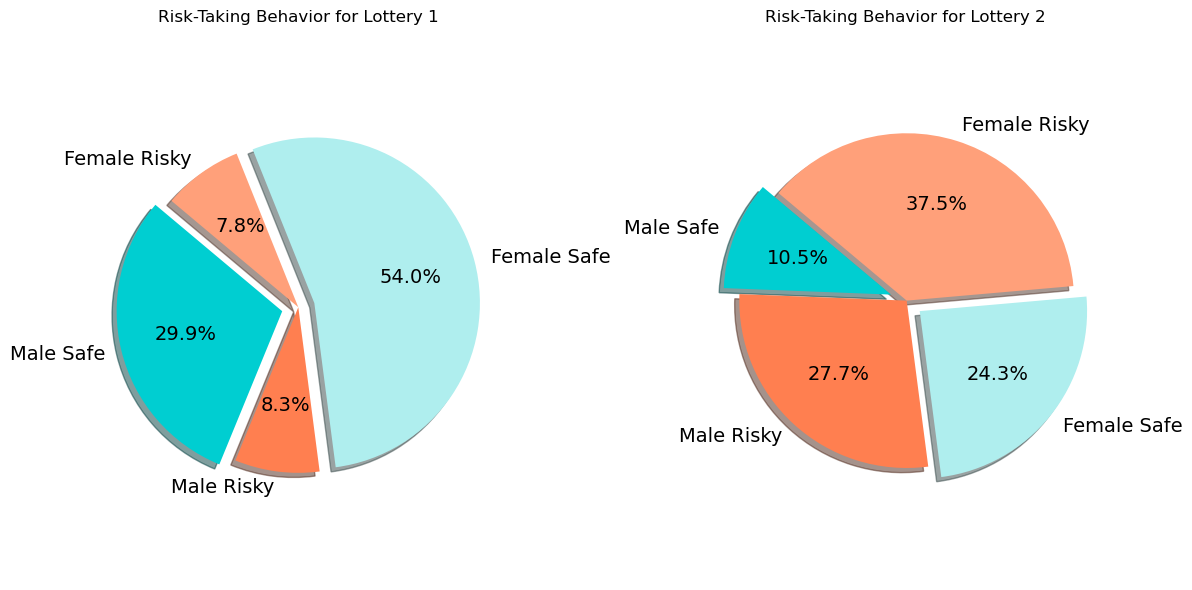

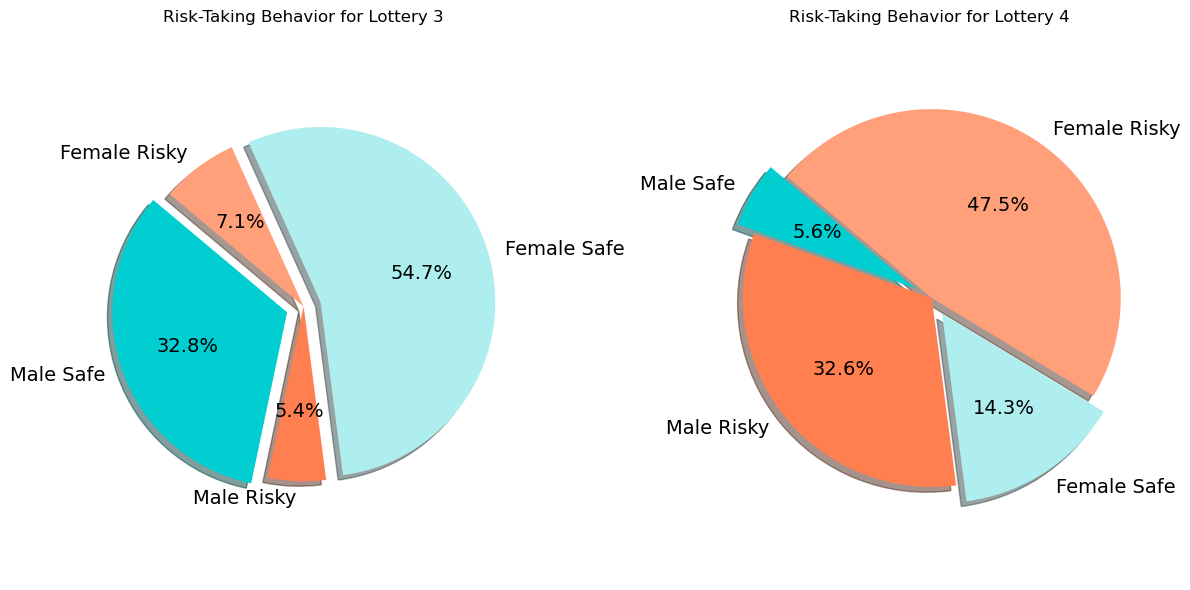

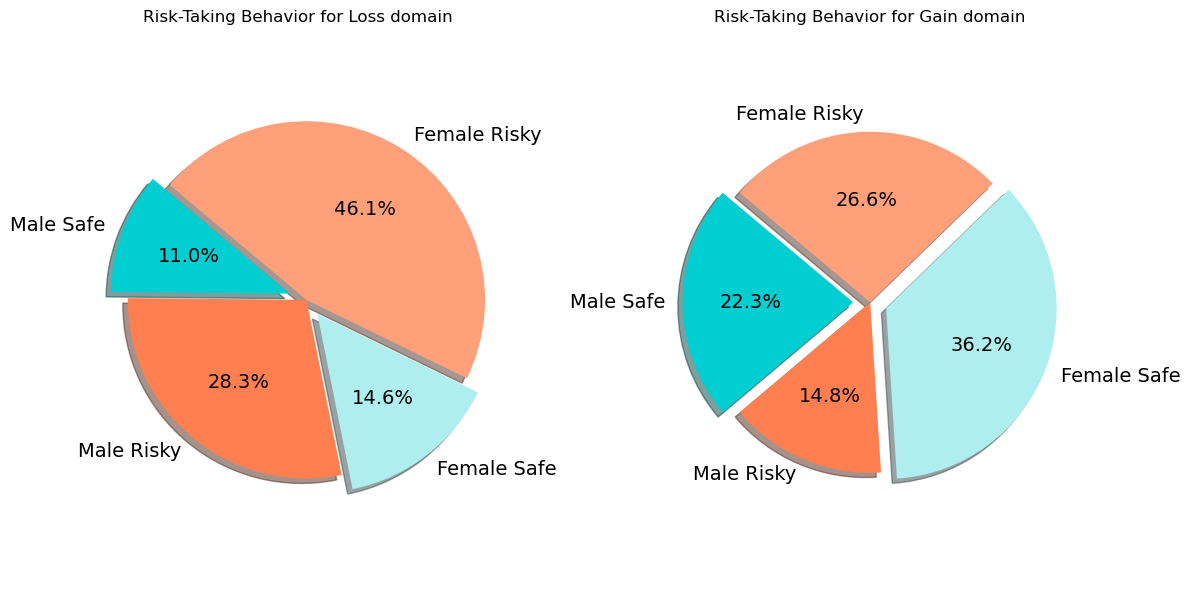

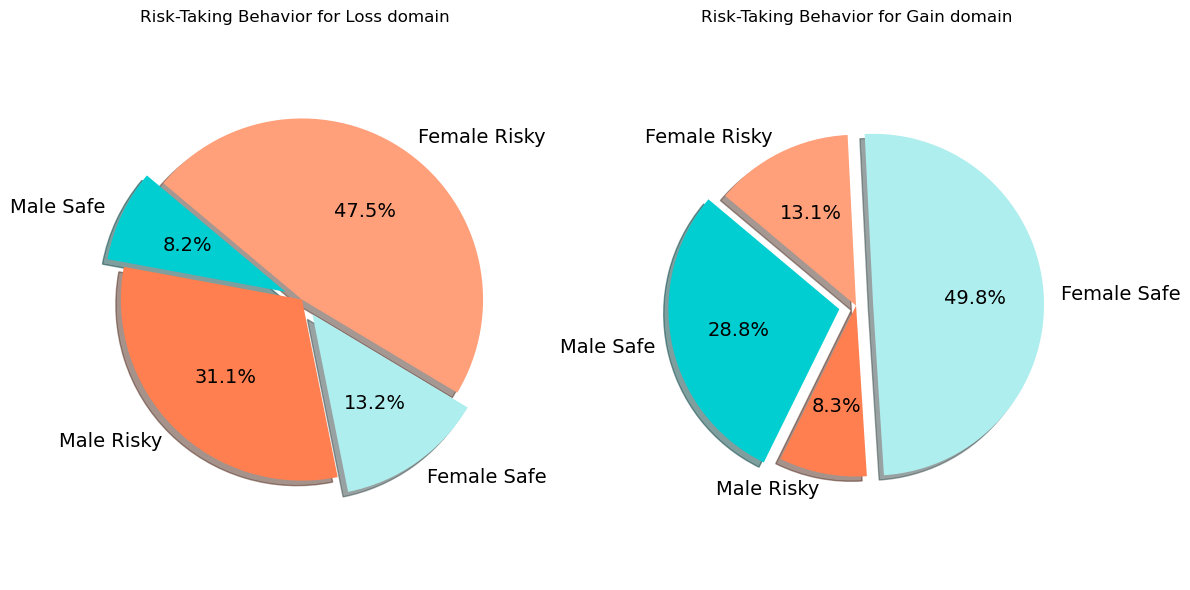

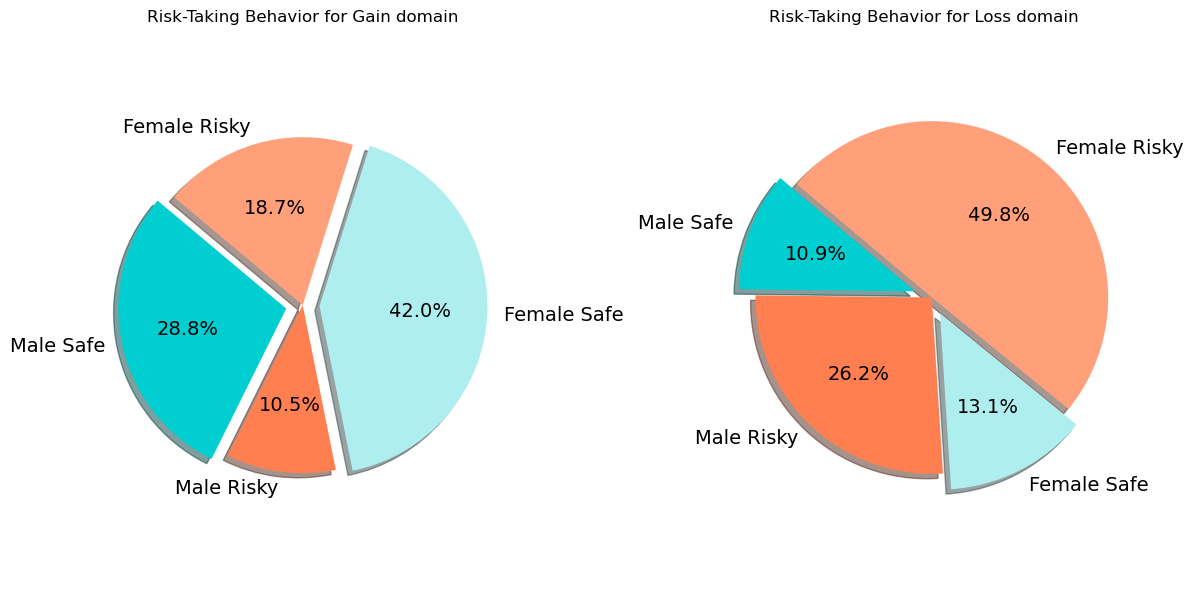

In [6]:
# Define pairs for plotting
pairs = [('Q2', 'Q5'), ('Q3', 'Q4'), ('Q9_2', 'Q6'), ('Q8', 'Q9'), ('Q7a', 'Q7b')]

# Define descriptive names for each column
column_to_name = {
    'Q2': 'Lottery 1',
    'Q5': 'Lottery 2',
    'Q3': 'Lottery 3',
    'Q4': 'Lottery 4',
    'Q9_2': 'Loss domain',
    'Q6': 'Gain domain',
    'Q8': 'Loss domain',
    'Q9': 'Gain domain',
    'Q7a': 'Gain domain',
    'Q7b': 'Loss domain'
}


# Loop through each pair of lottery columns and create pie charts
for pair in pairs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with 1 row and 2 columns
    for i, column in enumerate(pair):
# Prepare the data for the pie chart
        pie_data = {
        'Male Safe': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 1) & (risk_taking_data_binary[column] == 0)].shape[0],
        'Male Risky': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 1) & (risk_taking_data_binary[column] == 1)].shape[0],
        'Female Safe': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 2) & (risk_taking_data_binary[column] == 0)].shape[0],
        'Female Risky': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 2) & (risk_taking_data_binary[column] == 1)].shape[0]
    }

        # Create the pie chart
        labels = pie_data.keys()
        sizes = pie_data.values()
        colors = ['darkturquoise', 'coral', 'paleturquoise', 'lightsalmon']
        explode = (0.1, 0, 0.1, 0)  # explode Male Safe and Female Safe for better visualization

        # Get the descriptive name for the current column
        descriptive_name = column_to_name[column]

        axes[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=140, textprops={'fontsize': 14,})  
        axes[i].set_title(f'Risk-Taking Behavior for {descriptive_name}')
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

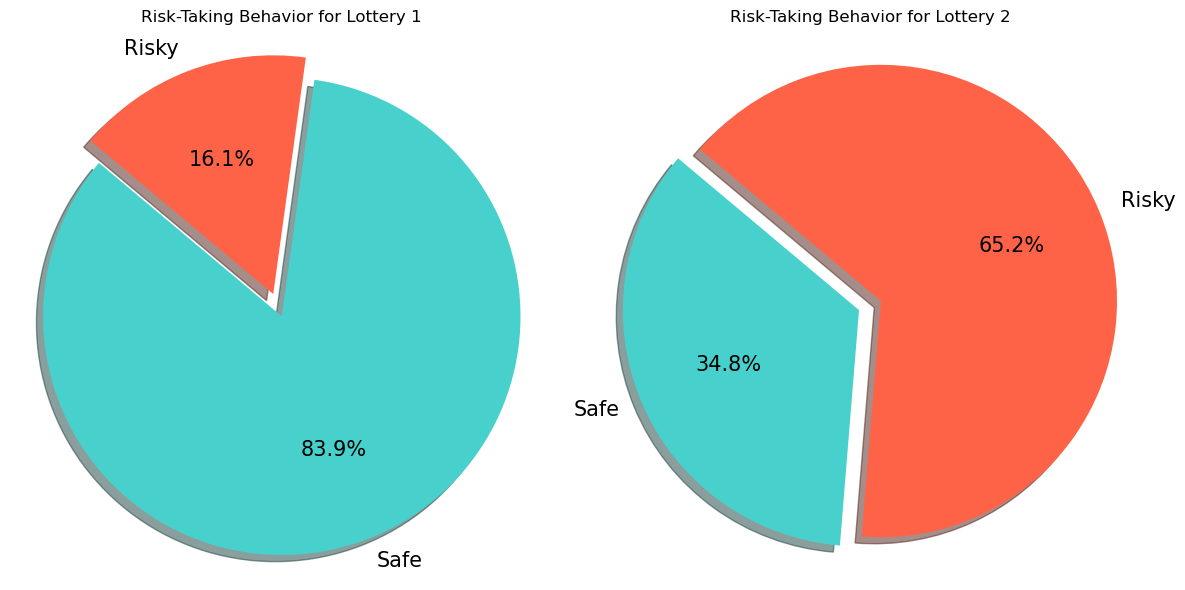

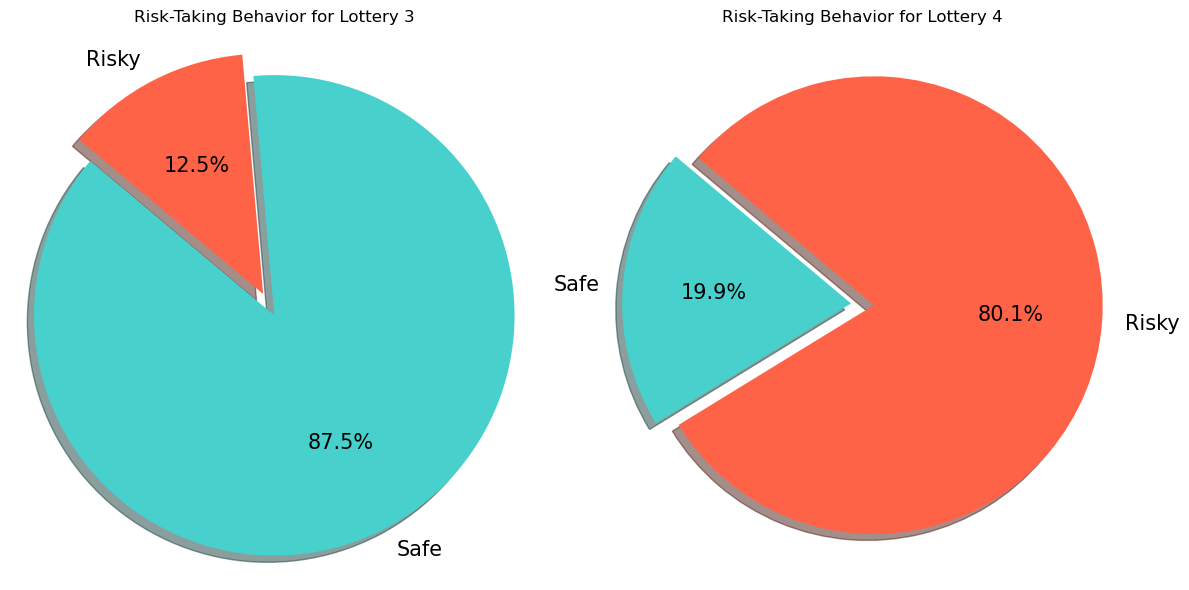

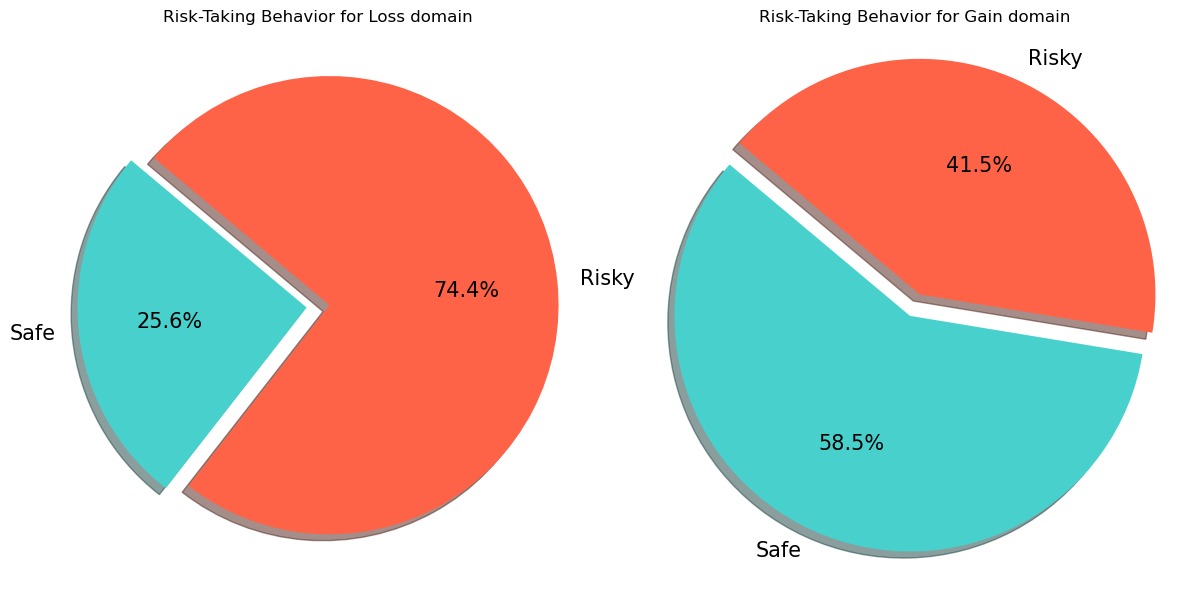

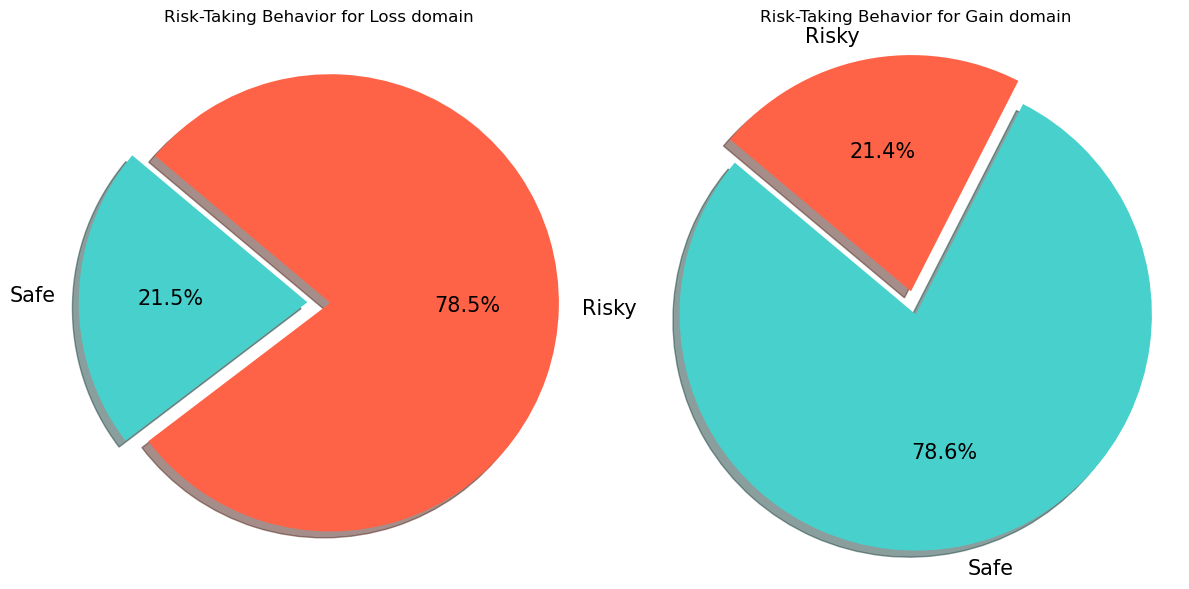

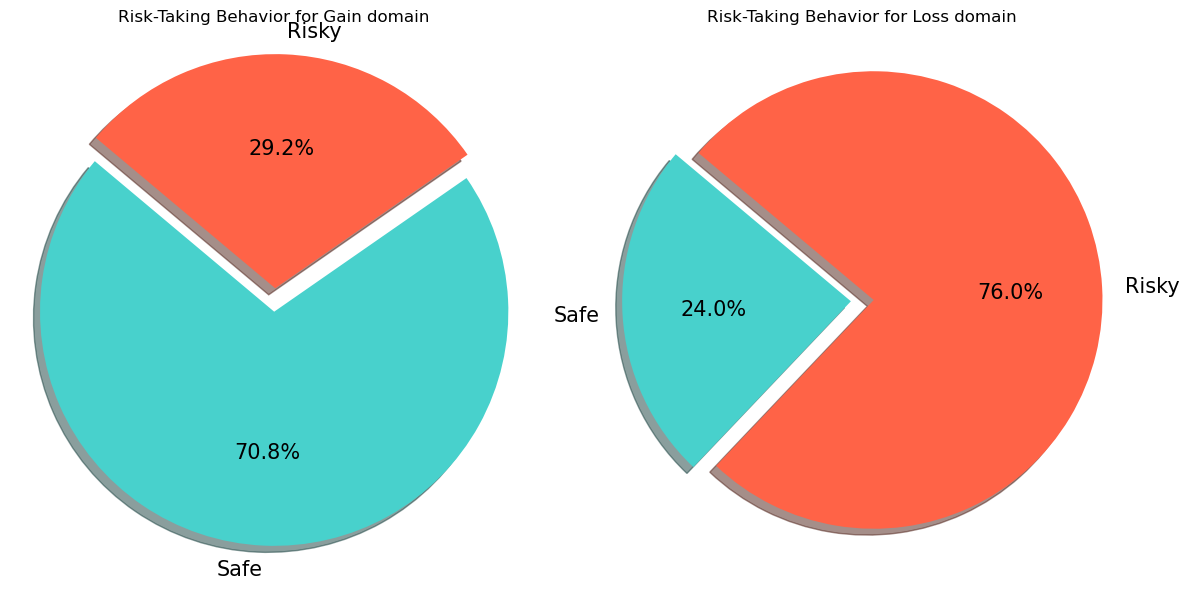

In [8]:
# Pie charts but without separating to gender
# Loop through each pair of lottery columns and create pie charts
for pair in pairs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with 1 row and 2 columns
    for i, column in enumerate(pair):
# Prepare the data for the pie chart
        pie_data = {
        'Safe':  risk_taking_data_binary[(risk_taking_data_binary[column] == 0)].shape[0],
        'Risky': risk_taking_data_binary[ (risk_taking_data_binary[column] == 1)].shape[0]
    }

        # Create the pie chart
        labels = pie_data.keys()
        sizes = pie_data.values()
        colors = ['mediumturquoise','tomato']
        explode = (0.1, 0)  

        # Get the descriptive name for the current column
        descriptive_name = column_to_name[column]

        axes[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=140, textprops={'fontsize': 15})  
        axes[i].set_title(f'Risk-Taking Behavior for {descriptive_name}')
        axes[i].axis('equal')  
    plt.tight_layout()
    plt.show()

In [11]:
# Define the pairs and their respective domains
pairs = {
    ('Q9_2', 'Q6'): ('loss', 'gain'),
    ('Q8', 'Q9'): ('loss', 'gain'),
    ('Q7a', 'Q7b'): ('loss', 'gain')
}


results = {}
# Function to perform chi-squared test and return the result
def chi_squared_test(counts1, counts2):
    # Create contingency table
    contingency_table = pd.DataFrame([counts1, counts2], columns=['safe', 'risky'])
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Separate and aggregate responses for each pair
for (col1, col2), (domain1, domain2) in pairs.items():
    df_loss = risk_taking_data_binary[col1].dropna().value_counts().sort_index()
    df_gain = risk_taking_data_binary[col2].dropna().value_counts().sort_index()
    
    # Ensure both counts have safe and risky categories
    df_loss = df_loss.reindex([0, 1], fill_value=0)
    df_gain = df_gain.reindex([0, 1], fill_value=0)
    
    counts_loss = df_loss.values
    counts_gain = df_gain.values
    
    if counts_loss.sum() > 0 and counts_gain.sum() > 0:
        chi2, p, dof, expected = chi_squared_test(counts_loss, counts_gain)
        results[(col1, col2)] = {
            'chi2': chi2,
            'p-value': p,
            'degrees_of_freedom': dof,
            'expected_frequencies': expected
        }
    else:
        results[(col1, col2)] = 'Not enough data for chi-squared test'

# Print results
for pair, result in results.items():
    print(f"Pair: {pair}, Result: {result}")

Pair: ('Q9_2', 'Q6'), Result: {'chi2': 48.40539147946194, 'p-value': 3.4661392401785384e-12, 'degrees_of_freedom': 1, 'expected_frequencies': array([[ 92.87946429, 126.12053571],
       [ 97.12053571, 131.87946429]])}
Pair: ('Q8', 'Q9'), Result: {'chi2': 143.9546361015706, 'p-value': 3.635038197978414e-33, 'degrees_of_freedom': 1, 'expected_frequencies': array([[110.96651786, 108.03348214],
       [116.03348214, 112.96651786]])}
Pair: ('Q7a', 'Q7b'), Result: {'chi2': 96.41642146599622, 'p-value': 9.309181871894415e-23, 'degrees_of_freedom': 1, 'expected_frequencies': array([[102.65625, 116.34375],
       [107.34375, 121.65625]])}


In [12]:
# Analyze social media usage

sm_columns = ['SEX','Perception of time on all social media',
       'Other social media', 'Instagram perception', 'TikTok perception',
       'FB perception', 'whatsApp perception', 'LinkedIn perception',
       'Twitter perception', 'Youtube perception', 'Snapchat perception',
       'Threads perception', 'Pinterest perception', 'other perception',
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']
sm_data = df_cleaned_time[sm_columns]
# Export the DataFrame to an Excel file
#sm_data.to_excel('sm_data.xlsx', index=False)

In [13]:
# Initializing lists to store results
test_names = []
variables = []
test_statistics = []
p_values = []

# Chi-square test for each lottery column and sex
for column in lotteries_columns[:-1]:
    contingency_table = pd.crosstab(risk_taking_data_binary['SEX'], risk_taking_data_binary[column])
    chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
    test_names.append('Chi-square')
    variables.append(column)
    test_statistics.append(chi2)
    p_values.append(p_chi2)
    # Independent t-test for each social media time column and sex
for column in sm_columns:
    male_social_media = survey[survey['SEX'] == 1][column]
    female_social_media = survey[survey['SEX'] == 2][column]
    t_social_media, p_social_media = stats.ttest_ind(male_social_media, female_social_media)
    test_names.append('Independent t-test')
    variables.append(column)
    test_statistics.append(t_social_media)
    p_values.append(p_social_media)
    # Creating a summary table
results_table = pd.DataFrame({
    'Test': test_names,
    'Variable': variables,
    'Test Statistic': test_statistics,
    'p-value': p_values
})

# Printing the results table for diffrence between the genders
print(results_table)
#results_table.to_excel('table_tests.xlsx', index=False)

                  Test                                    Variable  \
0           Chi-square                                          Q2   
1           Chi-square                                          Q3   
2           Chi-square                                          Q4   
3           Chi-square                                          Q5   
4           Chi-square                                        Q9_2   
5           Chi-square                                          Q6   
6           Chi-square                                          Q8   
7           Chi-square                                          Q9   
8           Chi-square                                         Q7a   
9           Chi-square                                         Q7b   
10  Independent t-test                                         SEX   
11  Independent t-test      Perception of time on all social media   
12  Independent t-test                          Other social media   
13  Independent t-te

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
# Replace 0 values with NaN, so the values 0 are not taken into the account when calculating the means
sm_data.replace(0, np.nan, inplace=True)

# Calculate statistics ignoring NaN
statistics = sm_data.describe()

# Create new columns for the differences
sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']

social_media = ["Instagram", "TikTok", "FB", "whatsApp", "LinkedIn", "Twitter", "Youtube", "Snapchat", "Threads", "Pinterest", "other"]
for media in social_media:
    perception_col = f"{media} perception"
    actual_col = f"{media} actual"
    if perception_col in sm_data.columns and actual_col in sm_data.columns:
        difference_col = f"difference_{media}"
        sm_data[difference_col] = sm_data[perception_col] - sm_data[actual_col]

# Display the statistics
print("\nStatistics (ignoring NaN):")
print(statistics)
print((sm_data['Perception of time on all social media']).describe())
print((sm_data['time spend on all social media apps actual']).describe())


Statistics (ignoring NaN):
              SEX  Perception of time on all social media  Other social media  \
count  448.000000                              448.000000          104.000000   
mean     1.618304                              258.348214           23.201923   
std      0.486346                               80.022056           15.076105   
min      1.000000                               60.000000            1.000000   
25%      1.000000                              180.000000           10.000000   
50%      2.000000                              240.000000           21.000000   
75%      2.000000                              300.000000           32.500000   
max      2.000000                              420.000000           56.000000   

       Instagram perception  TikTok perception  FB perception  \
count            416.000000         264.000000     275.000000   
mean              97.911058          99.965909      34.854545   
std              107.812462         123.128248 

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_48737/1152921165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data.replace(0, np.nan, inplace=True)
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_48737/1152921165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_48737/1152921165.py:16: SettingWithCopyWarning: 
A value is trying

In [15]:
# after we decided we won't look at the diffrence between percived and actual usage
#data2 = sm_data[['Perception of time on all social media','time spend on all social media apps actual']]
#statistics_table= data2.describe()

#excel_file = 'statistics_table.xlsx'
#statistics_table.to_excel(excel_file, index=True)

# Get descriptive statistics for columns 
stats_df_sm = descriptive_statistics(sm_data, 14, 26)

# Output the results
print(stats_df_sm)
#stats_df_sm.to_excel('stats_df_sm.xlsx')

                                              N    Mean  Std. Error  Median  \
time spend on all social media apps actual  448  270.26        5.04   255.0   
Instagram actual                            431  101.62        4.92    71.0   
TikTok actual                               270  116.90        6.88    80.0   
FB actual                                   314   32.02        2.06    20.0   
whatsApp actual                             151   25.59        3.61    10.0   
LinkedIn actual                              73   19.51        3.03     9.0   
Twitter actual                               82   48.93        8.63    20.5   
Youtube actual                              370   81.19        4.90    50.5   
Snapchat actual                             278   55.68        4.21    30.0   
Threads actual                               33   12.91        3.15     6.0   
Pinterest actual                            103   27.70        4.87    11.0   
other actual                                118   74

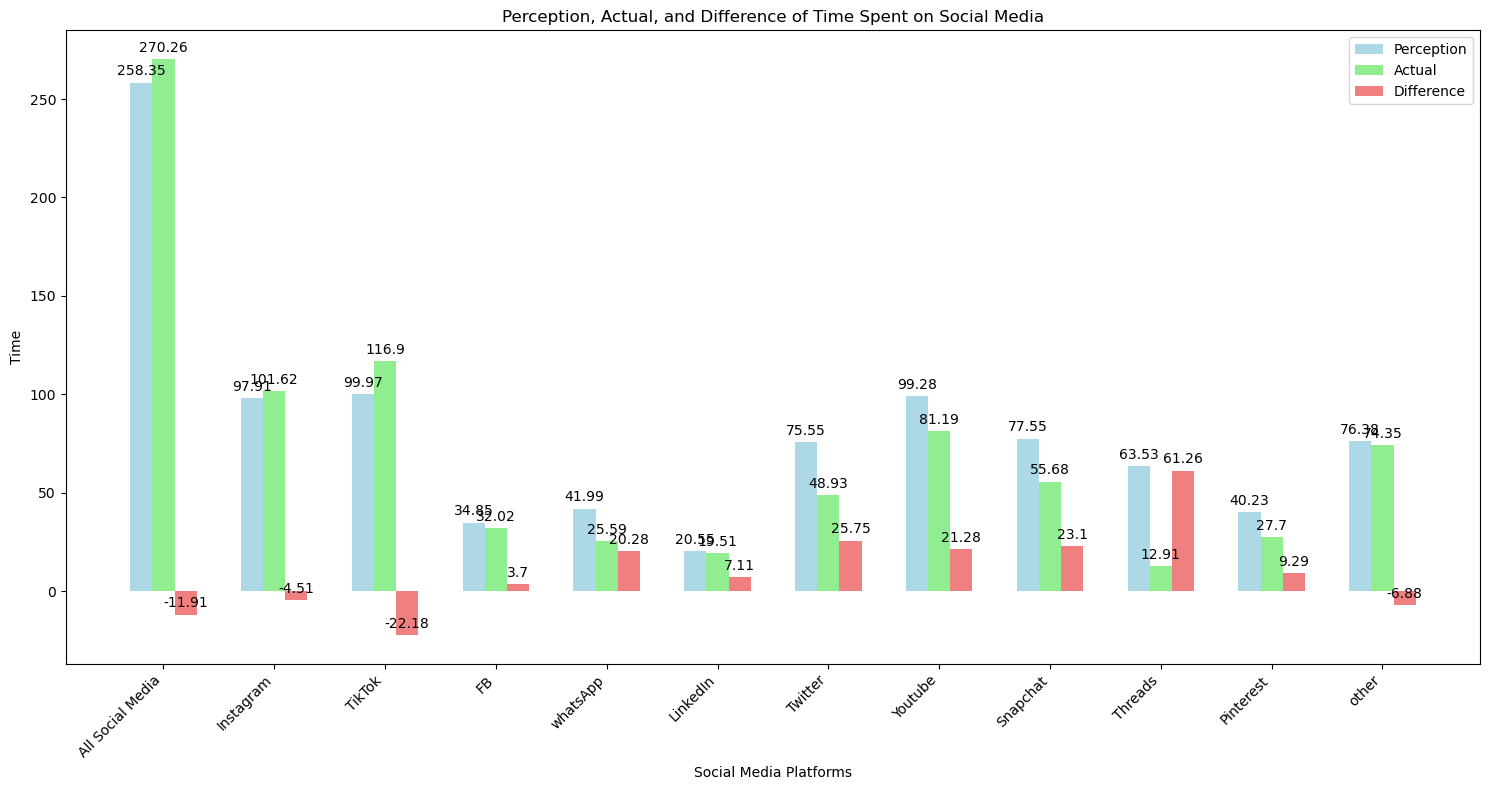

In [16]:
# Plotting


labels = ['All Social Media'] + social_media
perception_values = [sm_data['Perception of time on all social media'].mean()] + [sm_data[f"{media} perception"].mean() for media in social_media]
actual_values = [sm_data['time spend on all social media apps actual'].mean()] + [sm_data[f"{media} actual"].mean() for media in social_media]
difference_values = [sm_data['difference_all_social_media'].mean()] + [sm_data[f"difference_{media}"].mean() for media in social_media]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, perception_values, width, label='Perception', color='lightblue')
rects2 = ax.bar(x, actual_values, width, label='Actual', color='lightgreen')
rects3 = ax.bar(x + width, difference_values, width, label='Difference', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Social Media Platforms')
ax.set_ylabel('Time')
ax.set_title('Perception, Actual, and Difference of Time Spent on Social Media')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [435]:
#correlation analysis
correlation = sm_data[['Perception of time on all social media', 'time spend on all social media apps actual']].corr()
correlation

,Perception of time on all social media,time spend on all social media apps actual
Perception of time on all social media,1.000000,0.593307
time spend on all social media apps actual,0.593307,1.000000


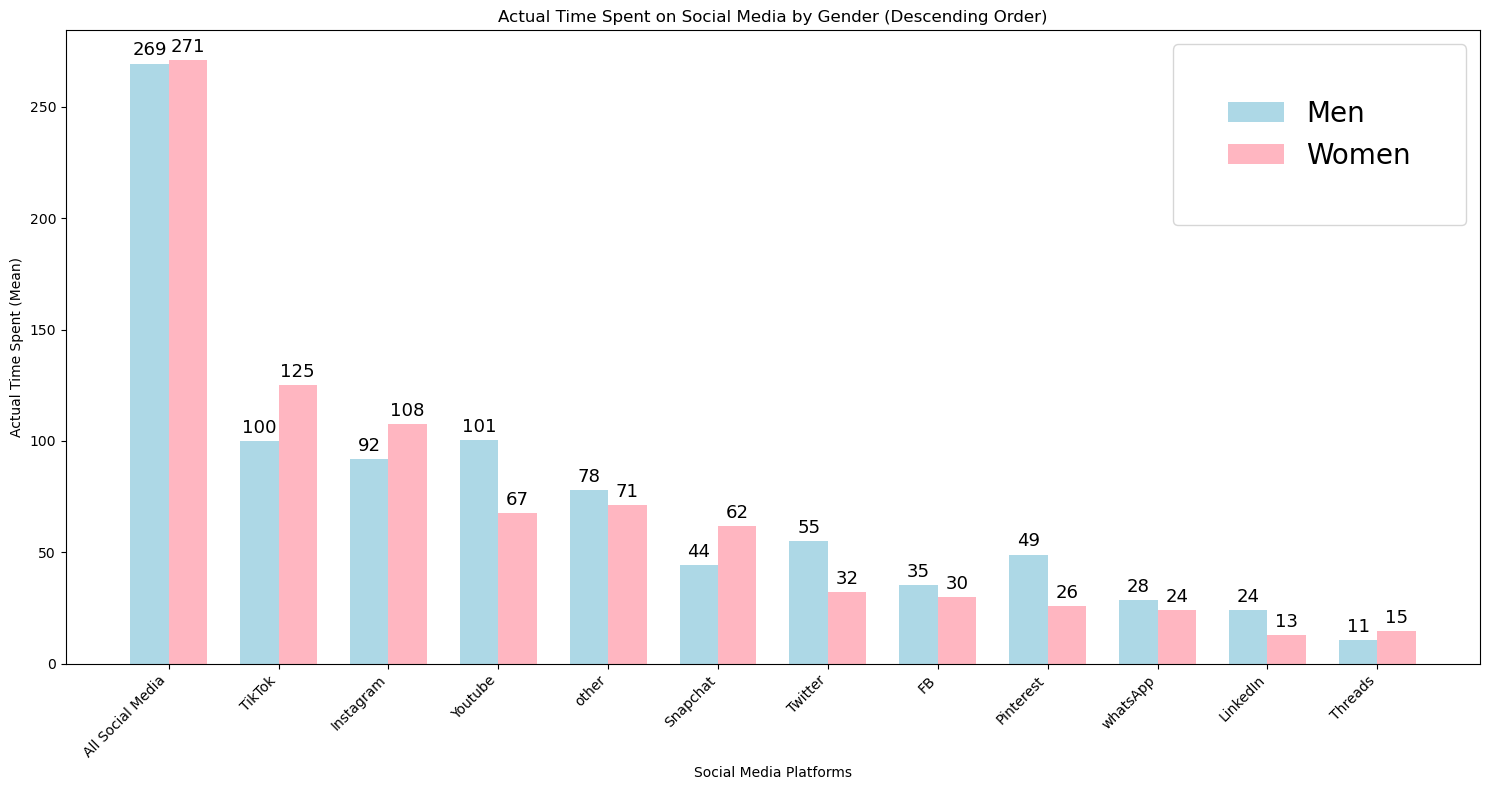

In [436]:
#Analysing the social media usage diffrences between sex 

# Filter data by gender
sm_data_men = sm_data[sm_data['SEX'] == 1]
sm_data_women = sm_data[sm_data['SEX'] == 2]

# Calculate the mean actual usage for each platform and overall social media usage for both genders
actual_values_men = {media: sm_data_men[f"{media} actual"].mean() for media in social_media}
actual_values_women = {media: sm_data_women[f"{media} actual"].mean() for media in social_media}

# Include the overall social media time
actual_values_men['All Social Media'] = sm_data_men['time spend on all social media apps actual'].mean()
actual_values_women['All Social Media'] = sm_data_women['time spend on all social media apps actual'].mean()

# Calculate the average actual usage across both genders for sorting purposes
average_actual_values = {media: sm_data[f"{media} actual"].mean() for media in social_media}
average_actual_values['All Social Media'] = sm_data['time spend on all social media apps actual'].mean()
# Sort the platforms (including 'All Social Media') by the average actual usage in descending order
sorted_social_media = sorted(average_actual_values, key=average_actual_values.get, reverse=True)

# Extract the sorted values for men and women
actual_values_sorted_men = [actual_values_men[media] for media in sorted_social_media]
actual_values_sorted_women = [actual_values_women[media] for media in sorted_social_media]

x = np.arange(len(sorted_social_media))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))

rects1 = ax.bar(x - width/2, actual_values_sorted_men, width, label='Men', color='lightblue')
rects2 = ax.bar(x + width/2, actual_values_sorted_women, width, label='Women', color='lightpink')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Social Media Platforms')
ax.set_ylabel('Actual Time Spent (Mean)')
ax.set_title('Actual Time Spent on Social Media by Gender (Descending Order)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_social_media, rotation=45, ha='right')
ax.legend(borderpad=2,prop={'size':20})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(round(height))),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size =13)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [18]:
# transforming risk taking outcomes into just one variable for lotteries, to see if we find some siginifcant resutls
# Create a risk-taking variable
def classify_risk_taking(row):
    num_risky = sum(row[col] == 1 for col in lotteries)
    num_safe = sum(row[col] == 0 for col in lotteries)
    if num_risky > num_safe:
        return 1  # Risk-taking
    elif num_safe > num_risky:
        return -1   # Risk-averse
    else:
        return 0   # Neutral

survey['risk_taking'] = survey.apply(classify_risk_taking, axis=1)

# Risk-taking framing effect from scenarios 
scenarios_columns = [ 'Q8', 'Q9', 'Q7a', 'Q7b']
def classify_framing(row):
    num_risky = sum(row[col] == 1 for col in scenarios_columns)
    num_safe = sum(row[col] == 0 for col in scenarios_columns)
    if num_risky == 2:
        return 0
    elif num_safe == 2:
        return 0   
    else:
        return 1   
    
    
survey['framing'] = survey.apply(classify_framing, axis=1)

# Create the new variable
def categorize_usage(minutes):
    if minutes <= 190: #190,150
        return 0
    elif minutes <= 270: #270
        return 1
    else:
        return 2

survey['social_media_group'] = survey['time spend on all social media apps actual'].apply(categorize_usage)

In [19]:
# Create the contingency table to see if there is any diffrence between the genders
contingency_table = pd.crosstab(survey['SEX'], survey['framing'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")


Chi-squared Statistic: 0.2752124697778573
P-value: 0.5998564425384998
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 59.92633929 111.07366071]
 [ 97.07366071 179.92633929]]


In [20]:
# Create contingency table for framing risk-taking and social media usage
contingency_framing_table = pd.crosstab(survey['framing'], survey['social_media_group'])

# Perform Chi-square test
chi2_f, p_f, _, _ = chi2_contingency(contingency_framing_table)
print(f"Chi-square statistic framing: {chi2_f}, p-value: {p_f}")

# Create contingency table for  risk-taking and social media usage
contingency_risk_table = pd.crosstab(survey['risk_taking'], survey['social_media_group'])

# Perform Chi-square test
chi2_r, p_r, deg_r, _ = chi2_contingency(contingency_risk_table)
print(f"Chi-square statistic risk: {chi2_r}, p-value: {p_r}, deg{deg_r}")

Chi-square statistic framing: 4.304860324433302, p-value: 0.11620142605555035
Chi-square statistic risk: 12.66945148514537, p-value: 0.01300910578238035, deg4


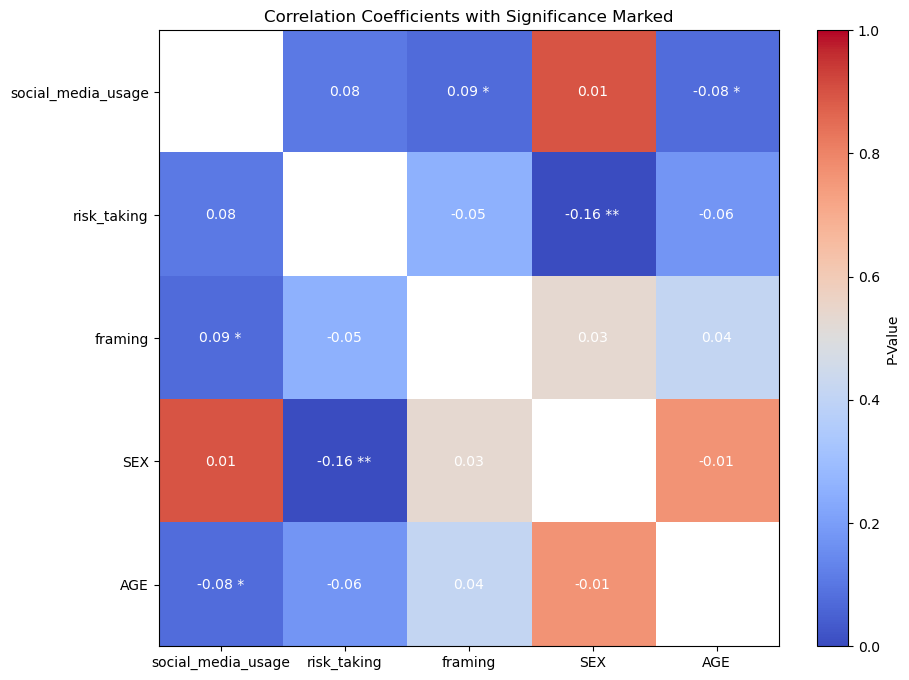

In [23]:
survey.rename(columns={'time spend on all social media apps actual': 'social_media_usage','Instagram actual':'Instagram','TikTok actual':'TikTok'}, inplace=True)
columns = ['social_media_usage','risk_taking','framing','SEX','AGE']
n = len(columns)

# Create matrices to store correlation coefficients and p-values
correlation_matrix = np.zeros((n, n))
p_value_matrix = np.zeros((n, n))

# Calculate correlation coefficients and p-values
for i in range(n):
    for j in range(n):
        if i == j:
            correlation_matrix[i, j] = np.nan
            p_value_matrix[i, j] = np.nan
        else:
            corr, p_value = pearsonr(survey[columns[i]], survey[columns[j]])
            correlation_matrix[i, j] = corr
            p_value_matrix[i, j] = p_value

# Create a combined DataFrame for plotting
combined_df = pd.DataFrame({
    'Correlation': correlation_matrix.flatten(),
    'P-Value': p_value_matrix.flatten(),
    'Row': np.repeat(range(n), n),
    'Col': np.tile(range(n), n)
})

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create a color map for p-values
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=0, vmax=1)

# Create the heatmap
heatmap = ax.imshow(p_value_matrix, cmap=cmap, norm=norm, aspect='auto')

# Annotate with correlation coefficients and significance stars
for i in range(n):
    for j in range(n):
        if not np.isnan(correlation_matrix[i, j]):
            value = correlation_matrix[i, j]
            p_value = p_value_matrix[i, j]
            annotation = f'{value:.2f}'
            if p_value < 0.05:
                annotation += ' **'
            elif p_value < 0.1:
                annotation += ' *'
            ax.text(j, i, annotation,
                    ha='center', va='center', color='white')


# Add color bar and labels
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical')
cbar.set_label('P-Value')

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
ax.set_title('Correlation Coefficients with Significance Marked')


plt.show()
